In [1]:
from mdcrow import MDCrow
import os 
import mdtraj as md

In [2]:
descriptive_prompt_10 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD of the simulation at 300 K. 5. Compute the radius of gyration over time for the simulation at 300 K. 6. Compute the SASA (solvent accessible surface area) for the simulation at 300 K. 7. Simulate for 1 ps at 400 K. 8. Compute the RMSD of the simulation at 400 K. 9. Compute the radius of gyration over time for the simulation at 400 K. 10. Compute the SASA (solvent accessible surface area) for the simulation at 400 K."
non_descriptive_prompt_10 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD, SASA, and radius of gyration of both simulations."

Required Tasks:
- Download
- SS Analysis
- Simulation_1
- RMSD_1
- Rgy_1
- SASA_1
- Simulation_2
- RMSD_2
- Rgy_2
- SASA_2

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_10)

Thought: To complete all these tasks, I'll need to start by downloading the PDB file for 1LYZ. Then I'll analyze its structure, run simulations, and perform various computations. Let's begin with downloading the file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": "1LYZ"
}
```Thought: I apologize for the confusion. It seems that the GetTurnsBetaSheetsHelices tool didn't provide the information we need. Let's try using the SummarizeProteinStructure tool to get information about the residues and structure of 1LYZ.

Action:
```
{
    "action": "SummarizeProteinStructure",
    "action_input": {"traj_file": "1LYZ_192526", "top_file": "1LYZ_192526"}
```I apologize for the error in 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [6]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_192526: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_192526
 1LYZ_192556: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_192600: Initial positions for simulation sim0_192600
 sim0_192600: Basic Simulation of Protein 1LYZ_192556
 rec0_192600: Simulation trajectory for protein 1LYZ_192556 and simulation sim0_192600
 rec1_192600: Simulation state log for protein 1LYZ_192556 and simulation sim0_192600
 rec2_192600: Simulation pdb frames for protein 1LYZ_192556 and simulation sim0_192600
 rmsd_192600: RMSD for 192600
 fig0_192645: RMSD plot for 192600
 rgy_rec0_192600: Radii of gyration per frame for rec0_192600
 fig0_192647: Plot of radii of gyration over time for rec0_192600
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_192734: Plot of SASA over time for 1LYZ
 top_sim0_192738: Initial positions for simulation sim0_192738
 sim0_

In [7]:
assert os.path.exists(registry.get_mapped_path("rec0_192600"))
assert os.path.exists(registry.get_mapped_path("top_sim0_192600"))
assert os.path.exists(registry.get_mapped_path("rmsd_192600"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_192600"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ"))

assert os.path.exists(registry.get_mapped_path("rec0_192739"))
assert os.path.exists(registry.get_mapped_path("top_sim0_192738"))
assert os.path.exists(registry.get_mapped_path("rmsd_192738"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_192739"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ_1"))

assert os.path.exists(registry.get_mapped_path("1LYZ_192556"))

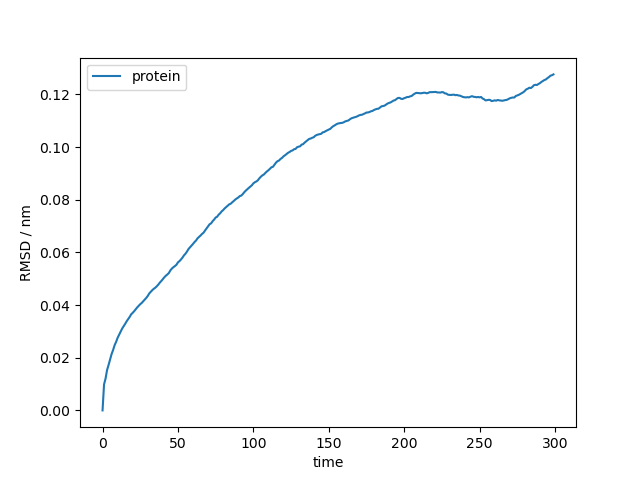

In [8]:
#plot rmsd1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_192645'))

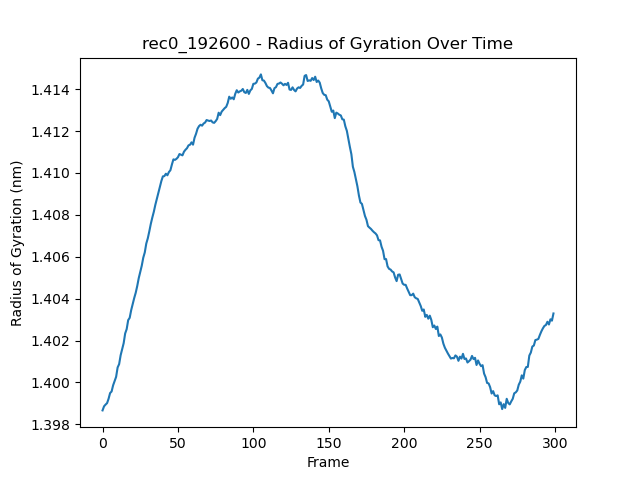

In [9]:
#plot rgy1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_192647'))

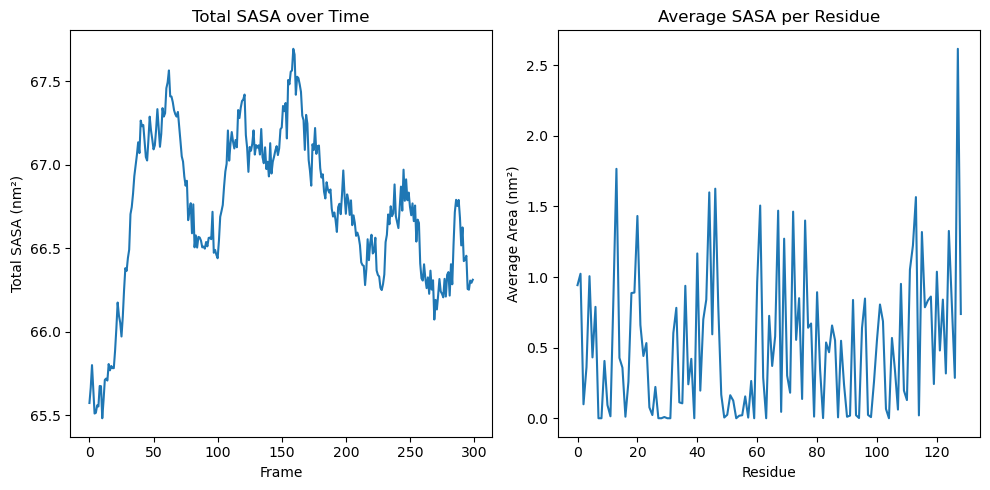

In [10]:
#plot sasa1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_192734'))

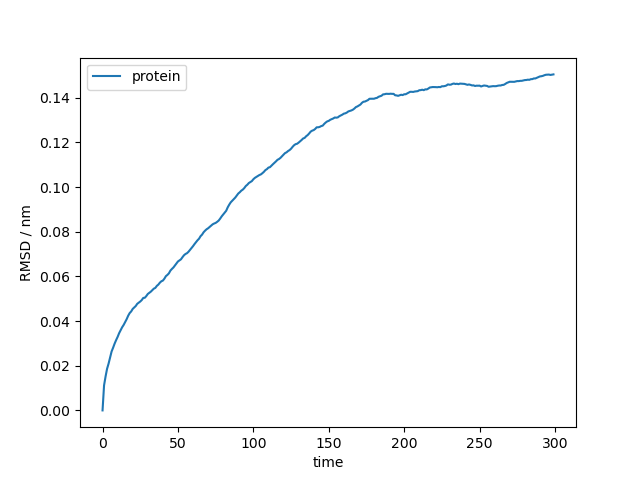

In [11]:
#plot rmsd2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_192809'))

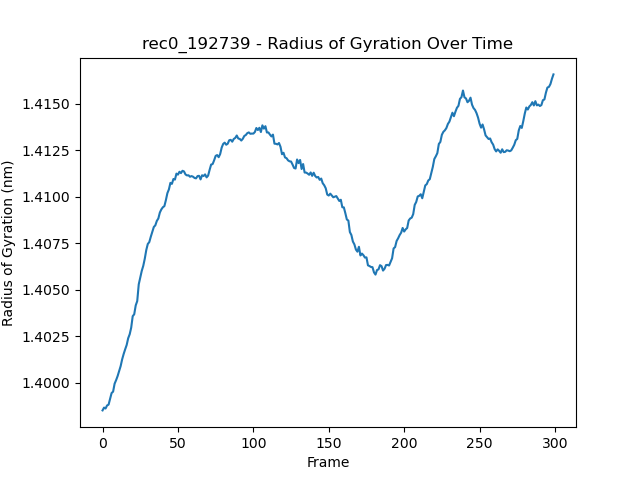

In [12]:
#plot rgy2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_192812'))

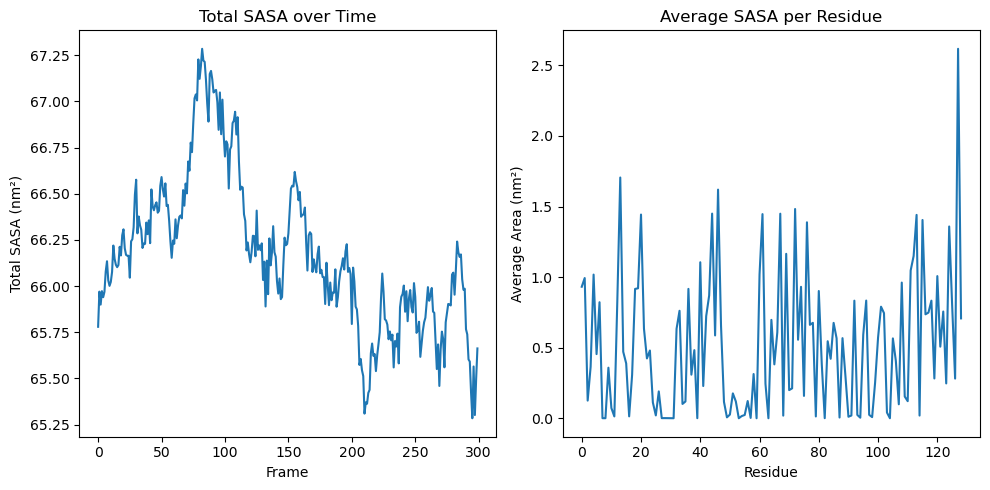

In [13]:
#plot sasa2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_192853'))

In [14]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_10)

Thought: To answer this question, we need to perform several steps. First, we'll download the PDB file for 1LYZ, set up and run simulations at 300K and 400K, analyze the structure, and then compute various properties. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run simulations at 300K and 400K. We'll start with the 300K simulation.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_204102",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001,
        

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [15]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_204102: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_204102
 1LYZ_204113: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_204118: Initial positions for simulation sim0_204118
 sim0_204118: Basic Simulation of Protein 1LYZ_204113
 rec0_204122: Simulation trajectory for protein 1LYZ_204113 and simulation sim0_204118
 rec1_204122: Simulation state log for protein 1LYZ_204113 and simulation sim0_204118
 rec2_204122: Simulation pdb frames for protein 1LYZ_204113 and simulation sim0_204118
 top_sim0_204526: Initial positions for simulation sim0_204526
 sim0_204526: Basic Simulation of Protein 1LYZ_204113
 rec0_204530: Simulation trajectory for protein 1LYZ_204113 and simulation sim0_204526
 rec1_204530: Simulation state log for protein 1LYZ_204113 and simulation sim0_204526
 rec2_204530: Simulation pdb frames for protein 1LYZ_2041

In [16]:
assert os.path.exists(registry.get_mapped_path("rec0_204122"))
assert os.path.exists(registry.get_mapped_path("top_sim0_204118"))
assert os.path.exists(registry.get_mapped_path("rmsd_204118"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_204122"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ"))

assert os.path.exists(registry.get_mapped_path("rec0_204530"))
assert os.path.exists(registry.get_mapped_path("top_sim0_204526"))
assert os.path.exists(registry.get_mapped_path("rmsd_204526"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_204530"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ_1"))

assert os.path.exists(registry.get_mapped_path("1LYZ_204113"))

In [18]:
from mdcrow.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry)
dssp._run(traj_file="rec0_204122", top_file="top_sim0_204118", target_frames="last")

"{'residues in helix': 57, 'residues in strand': 14, 'residues in coil': 58, 'residues not assigned, not a protein residue': 6788}"

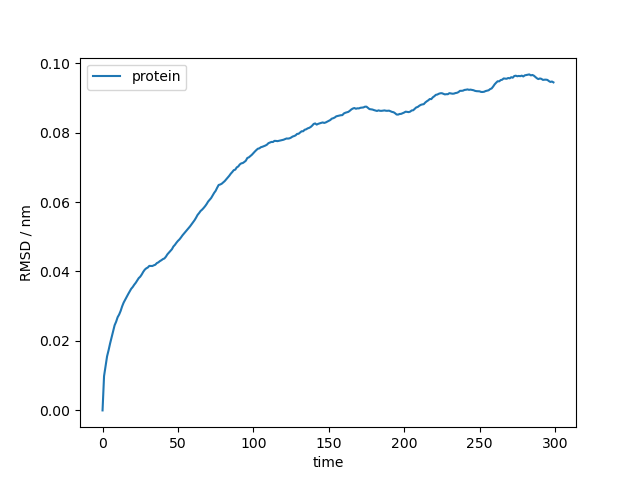

In [19]:
#plot rmsd1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_204944'))

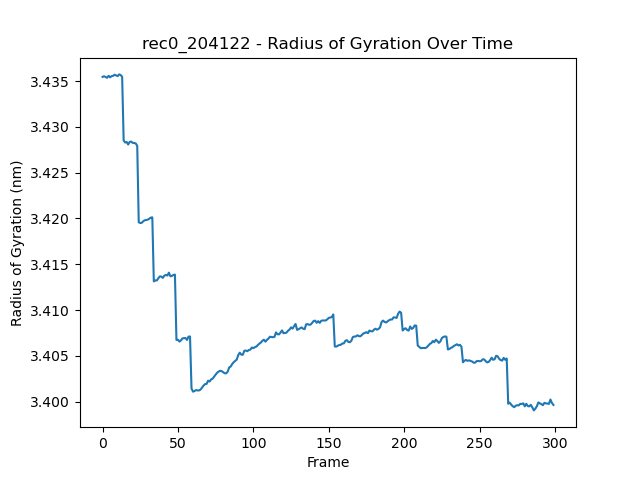

In [20]:
#plot rgy1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_205825'))

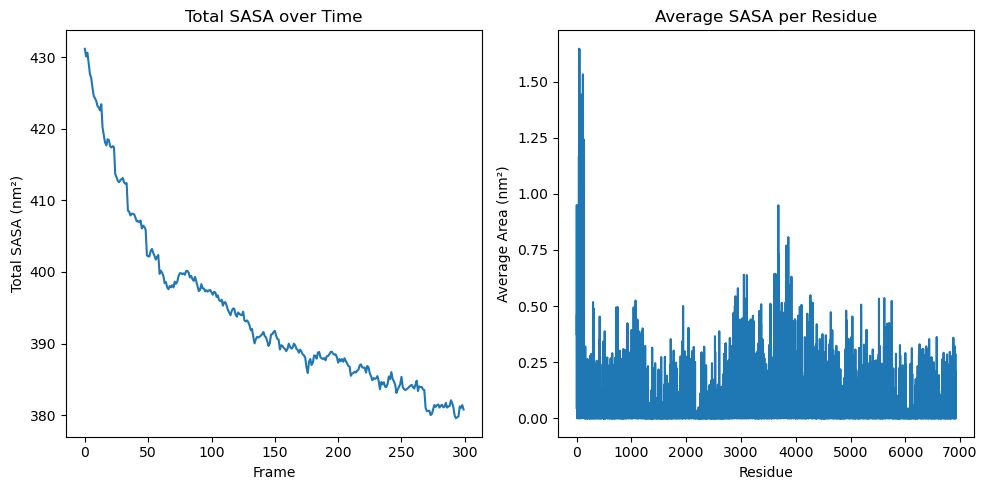

In [21]:
#plot sasa1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_205821'))

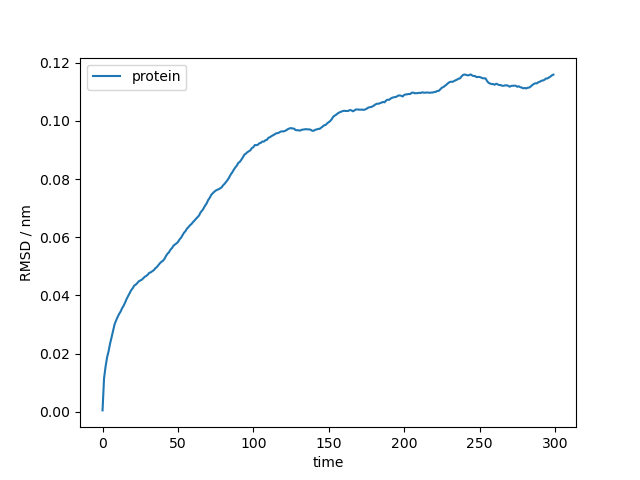

In [22]:
#plot rmsd2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_205829'))

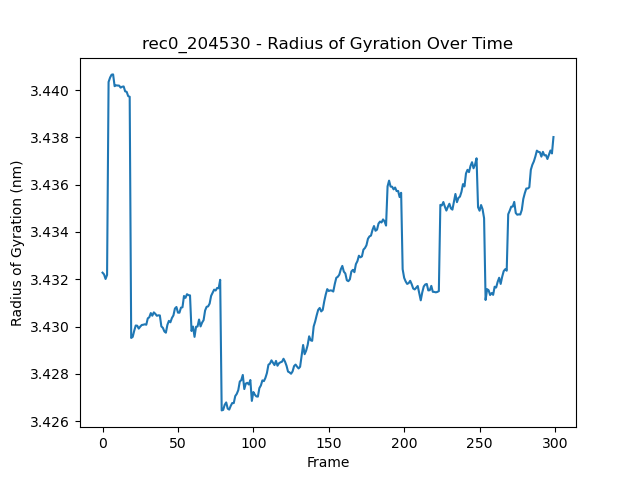

In [23]:
#plot rgy2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_210707'))

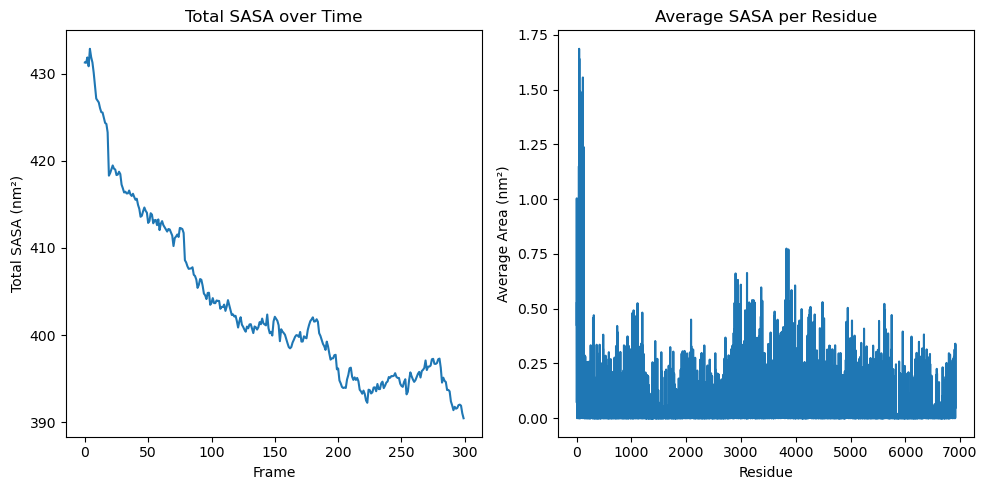

In [24]:
#plot sasa2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_210704'))